# Volume/Height relationship in wells with square cross-section

The width of the well at the bottom is 2.67 mm. and at the top (height, $H$, of 11.43 mm.) is
3.63 mm.

At a height, $H$, the cross section is a square of size $2.67 + (3.63 - 2.67)H/11.43$ mm.

In [1]:
using Polynomials, DataFrames, Gadfly
plen = Poly([0.96/11.43,2.67])  # polynomial representing length of square

Poly(0.08398950131233596 + 2.67x)

In [2]:
parea = plen * plen

Poly(0.007054236330694883 + 0.448503937007874x + 7.1289x^2)

The volume will be the integral from $0$ to $H$ of `parea`

In [3]:
pvol = polyint(parea)

Poly(0.007054236330694883x + 0.224251968503937x^2 + 2.3763x^3)

A plot of this function is

In [4]:
using Gadfly

In [5]:
H = 0.:0.01:11.43;
d = DataFrame(H=H);
d[:V] = polyval(pvol,d[:H]);
head(d)

,H,V
1,0.0,0.0
2,0.01,9.534386015734253e-5
3,0.02,0.00024979591401547244
4,0.03,0.0004776139615743898
5,0.04,0.0007930558028340945
6,0.05,0.001210379237794587


In [6]:
tail(d)

,H,V
1,11.38,3531.217952932965
2,11.39,3540.509439884657
3,11.4,3549.8172113209425
4,11.41,3559.1412814996206
5,11.42,3568.481664678494
6,11.43,3577.838375115359


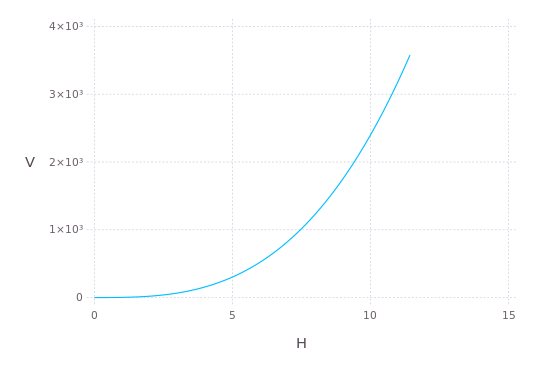

In [7]:
plot(d,x="H",y="V",Geom.line)

In [8]:
real(roots(pvol - 10.)[1])

1.5830281354897568

In [9]:
real(roots(pvol -12.)[1])

1.6841887428752342

In [10]:
real(roots(pvol - 20.)[1])

2.0026642322590833

## Calculations for a cylindrical well

The cylindrical wells have a depth of 11.47 mm and a diameter (top/bottom) of 5.0/4.5 mm., corresponding to a radius of 2.5/2.25 mm.

The radius $r$ at a height $H$ will be $2.25 + (0.25)*H/11.47$ mm

In [11]:
pradius = Poly([(0.25)/(11.47), 2.25])

Poly(0.021795989537925022 + 2.25x)

Just to make sure that I got that right.

In [12]:
polyval(pradius,[0.,11.47])

2-element Array{Float64,1}:
  0.021796
 25.8293  

In [13]:
parea = π * pradius * pradius

Poly(0.001492461216435598 + 0.3081335427452936x + 15.904312808798327x^2)

In [14]:
polyval(parea,[0.,11.47])

2-element Array{Float64,1}:
    0.00149246
 2095.92      

In [15]:
pvol = polyint(parea)

Poly(0.001492461216435598x + 0.1540667713726468x^2 + 5.301437602932776x^3)

In [16]:
H = collect(0.:0.01:12.);

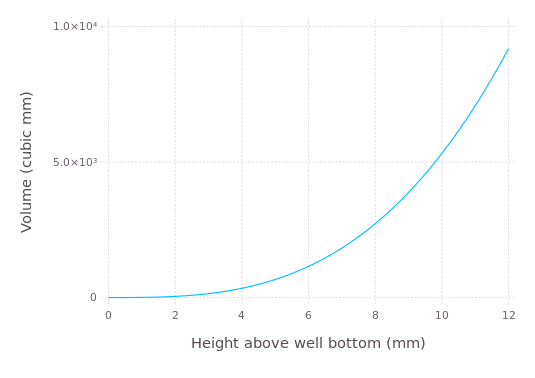

In [17]:
plot(x=H,y=polyval(pvol,H),Geom.line,
Guide.XLabel("Height above well bottom (mm)"),
Guide.YLabel("Volume (cubic mm)"))

In [18]:
real(roots(pvol - 50.)[1])

2.1031148839353024

In [19]:
real(roots(pvol - 100.)[1])

2.652276552737293

In [20]:
real(roots(pvol - 150.)[1])

3.037500591065999

As a table

In [21]:
H = collect(0.0:0.1:12.0);
writecsv("./htVol.csv",[H polyval(pvol,H)])